### Import necessary tools

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_recall_curve, average_precision_score

import torch

In [10]:
NUM_LABELS = 919

### Load the targets and the predictions

In [11]:
targets = np.load('../data/y_test.npy')
predictons = torch.load('./test_predictions.pth', map_location=torch.device('cpu')).numpy()

# Compute PR curve and PR area for each class

In [12]:
precision = {}
recall = {}
pr_auc = {}
for i in range(NUM_LABELS):
    precision[i], recall[i], _ = precision_recall_curve(targets[:, i], predictons[:, i])
    pr_auc[i] = average_precision_score(targets[:, i], predictons[:, i])

/Users/victor/Library/Caches/pypoetry/virtualenvs/neuralsea-WibNdV2i-py3.8/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:681: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


# Plot ROC curves

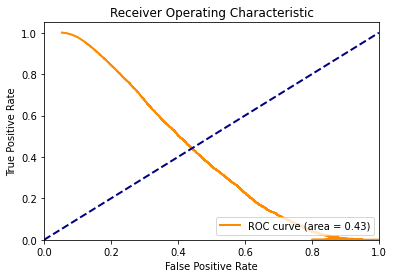

In [14]:
plt.figure()
lw = 2
label_idx = 42

plt.plot(precision[label_idx], recall[label_idx], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % pr_auc[label_idx])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Compute micro-average ROC curve and ROC area

In [16]:
precision['micro'], recall['micro'], _ = precision_recall_curve(targets.ravel(), predictons.ravel())
roc_auc['micro'] = average_precision_score(targets.ravel(), predictons.ravel())

NameError: name 'roc_auc' is not defined

# Compute macro-average ROC curve and ROC area

In [6]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(NUM_CLASSES)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(NUM_CLASSES):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= NUM_CLASSES

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

# Plot micro and macro ROC curves

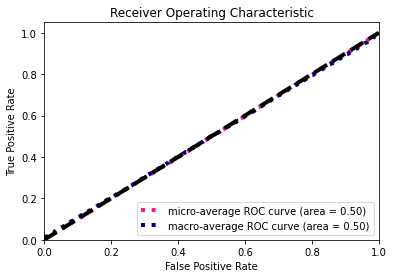

In [7]:
plt.figure()
lw = 4
plt.plot(fpr['micro'], tpr['micro'],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['micro']),
         color='deeppink', linestyle=':', lw=lw)

plt.plot(fpr['macro'], tpr['macro'],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['macro']),
         color='navy', linestyle=':', lw=lw)

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()